# Building an AI Pipeline with the Wisconsin Breast Cancer Dataset
### Ayra Qutub


---


## Introduction
The purpose of this project is to build an AI pipeline using scikit-learn for preprocessing, training, and evaluating a machine learning model on the Wisconsin Breast Cancer dataset.

AI pipelines are increasingly relevant in modern systems and real-world AI applications. Automated pipelines allow models to continuously retrain with new data, keeping models relevant as patterns change. They save time and reduce human intervention.

The pipeline will have four stages. These are:

1.   Data collection
2.   Data preprocessing
3.   Model training
4.   Model evaluation

This is typically followed by a fifth step, deployment, which will not be explored in this project.

We will be training *k Nearest Neighbour* (k-NN) models for various values of *k*, and evaluating their performance.


In [ ]:
%pip install ucimlrepo
from ucimlrepo import fetch_ucirepo
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score


##Data Collection
In this project, we will be working with the Wisconsin Breast Cancer dataset. This dataset holds ten real-valued features, computed for each of three cell nuclei from a patient. These features are:
1. radius (mean of distances from center to points on the perimeter)
2. texture (standard deviation of gray-scale values)
3. perimeter
4. area
5. smoothness (local variation in radius lengths)
6. compactness (perimeter^2 / area - 1.0)
7. concavity (severity of concave portions of the contour)
8. concave points (number of concave portions of the contour)
9. symmetry
10. fractal dimension ("coastline approximation" - 1)

For each patient, a diagnosis is provided. This can be denoted as either malignant (M) or benign (B). These are our targets.


In [ ]:
def dataCollection():
  # fetch dataset
  breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

  # data (as pandas dataframes)
  X = breast_cancer_wisconsin_diagnostic.data.features #attributes
  y = breast_cancer_wisconsin_diagnostic.data.targets #diagnosis
  return X, y

#####Data Visualization
To begin processing the data, we'll take a look at the basic statistics of each attribute. These are visualized below as side-by-side boxes and whisker plots.

In [ ]:
def dataVisualization(X):
  Data = [{'radius1': X.radius1, 'radius2': X.radius2, 'radius3': X.radius3},
          {'texture1':X.texture1, 'texture2':X.texture2, 'texture3':X.texture3},
          {'perimeter1':X.perimeter1, 'perimeter2':X.perimeter2, 'perimeter3':X.perimeter3},
          {'area1':X.area1, 'area2':X.area2, 'area3':X.area3},
          {'smoothness1':X.smoothness1, 'smoothness2':X.smoothness2, 'smoothness3':X.smoothness3},
          {'compactness1':X.compactness1, 'compactness2':X.compactness2, 'compactness3':X.compactness3},
          {'concavity1':X.concavity1, 'concavity2':X.concavity2, 'concavity3':X.concavity3},
          {'concave_points1':X.concave_points1, 'concave_points2':X.concave_points2, 'concave_points3':X.concave_points3},
          {'symmetry1':X.symmetry1, 'symmetry2':X.symmetry2, 'symmetry3':X.symmetry3},
          {'fractal_dimension1':X.fractal_dimension1, 'fractal_dimension2':X.fractal_dimension2, 'fractal_dimension3':X.fractal_dimension3}]

  for i in Data:
    labels = list(i.keys())
    data = list(i.values())
    plt.boxplot(data)
    plt.xticks(range(1, len(labels) + 1), labels)
    title = list(i.keys())[0][:-1]
    plt.title(title)
    plt.ylabel('Value')
    plt.show()

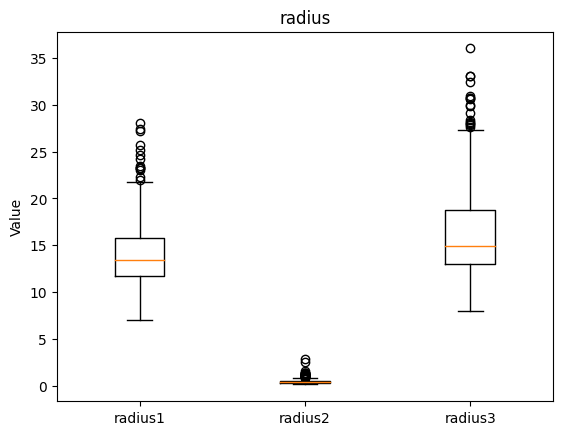

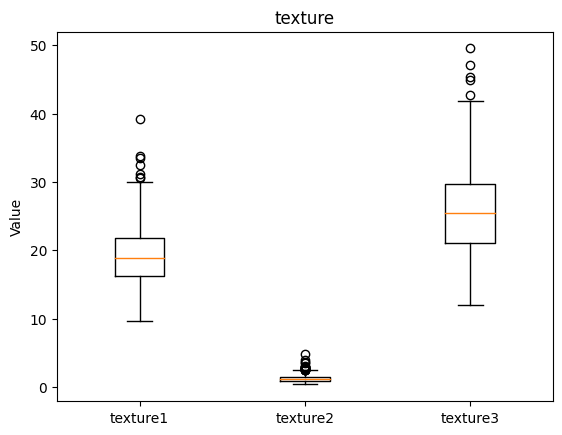

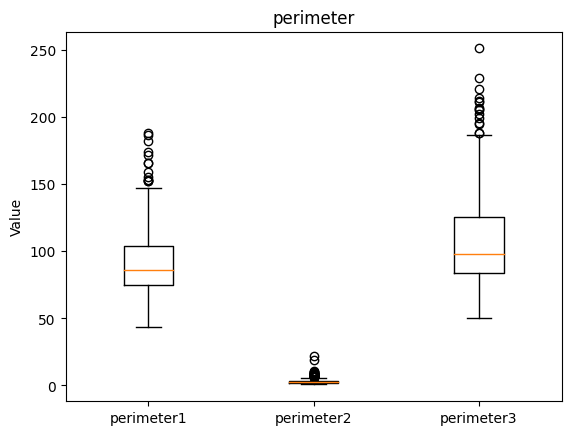

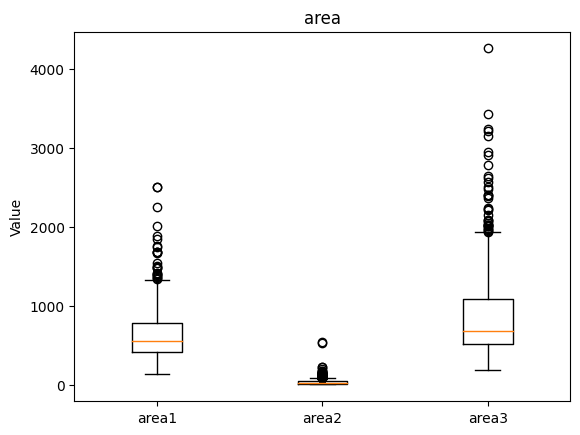

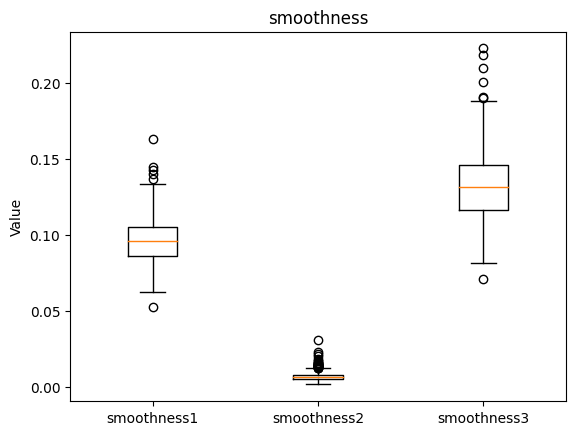

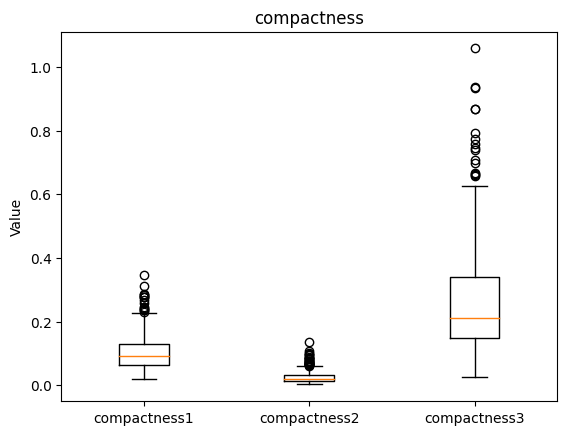

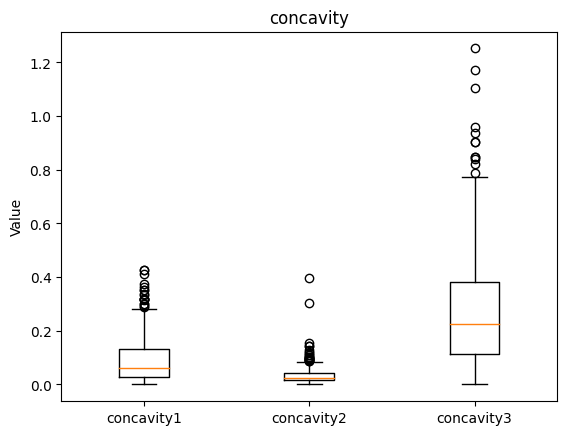

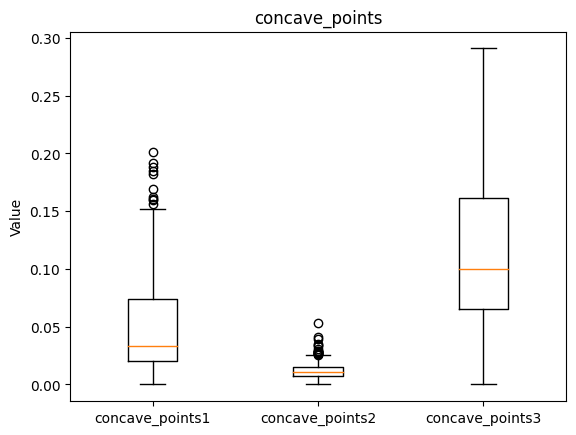

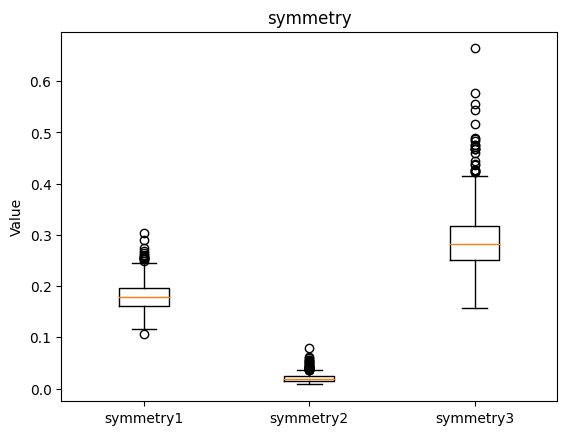

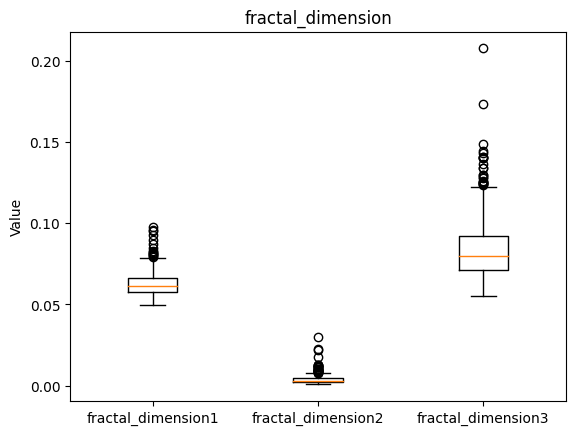

In [ ]:
dataVisualization(dataCollection()[0])

##Data Preprocessing
To preprocess the data, we take four main steps:

**1.   Data cleaning**

To clean the data, we are using the method of mean imputation. We find any missing (null) values, and fill them with the mean value of that attribute within the same class.

**2.   Data Scaling**

To scale the data, each attribute is refitted to the interval [0,1].

**3.   Transform categorical values**

The class labels for our target class are transformed to 0 for benign (B) and 1 for malignant (M).

**4.   Split training and testing data**

We're randomly splitting the dataset into a set of testing and a set of training data. To keep the data representative of the set and preserve class frequencies, we will be using stratified sampling to split the set.


These have all been combined into a data preprocessing function to be implemented in the pipeline.

In [ ]:
##Data Preprocessing

def dataCleaning(X):
  # fill missing values
  if((X.isnull().sum().sum())>0):
    X = X.fillna(X.mean())
  return X

def dataScaling(X):
  # scale values
  scaler = MinMaxScaler()
  X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
  return X

def categorical(y):
  # transform labels
  encoder = LabelEncoder()
  y = encoder.fit_transform(np.ravel(y))
  return y

def trainTestSplit(X, y):
  # split data
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
  return X_train, X_test, y_train, y_test


def dataPreprocessing(X, y):
  X = dataCleaning(X)
  X = dataScaling(X)
  y = categorical(y)
  X_train, X_test, y_train, y_test = trainTestSplit(X, y)
  return X_train, X_test, y_train, y_test

##Model Training
Next, we will train and test the data. We'll be training a k-NN classifier to model the dataset. This approach predicts the class of a test point as the class of the k-nearest datapoints to it in feature space.

In [ ]:
def modelTraining(X_train, y_train, X_test, i):
  # train model
  model = KNeighborsClassifier(n_neighbors=i)
  model.fit(X_train, y_train)
  #test model
  y_pred = model.predict(X_test)
  return y_pred

##Model Evaluation
To evaluate the performance of the model as it tries to predict the class of a datapoint, we will assess the model's F1 score. The F1 score computes the model's precision and recall. Its formula is as follows:

F1 = (2TP)/(2TP+FN+FP)

Where TP is the number of true positives, FN is the number of false negatives, and FP is the number of false positives.

An F1 score is a value between 0 and 1, where the worst score is 0 and the best score is 1 (which is achieved when there are no false positives or false negatives).

We are calculating this score for values of *k* from 1 to 10. These will then be visualized on a plot.

In [ ]:
def modelEvaluation(y_test, y_pred, i):
  # evaluate model
  f1 = f1_score(y_test, y_pred)
  print(f"   F1 score for k={i}: {f1:.3f}")
  return f1

In [ ]:
def displayResults(F1_scores):
    # display results
    k = np.arange(1, len(F1_scores) + 1)

    plt.plot(k, F1_scores, marker='o')
    plt.grid(True, axis='y')
    plt.xlabel("k")
    plt.ylabel("F1 Scores")
    plt.title("F1 Scores vs k")

    plt.show()

##The Pipeline
As a final step, all of the above is automated and put into a pipeline function, which, in this case, we will be calling as the main function.
This does all the steps we set out to do: It takes in the data, processes it, trains a model on it, and then evaluates the model. The model is evaluated for values of *k* from 1 to 10. The F1 values are displayed and then plotted against the corresponding values of *k*.


Results:
   F1 score for k=1: 0.902
   F1 score for k=2: 0.923
   F1 score for k=3: 0.938
   F1 score for k=4: 0.937
   F1 score for k=5: 0.950
   F1 score for k=6: 0.937
   F1 score for k=7: 0.938
   F1 score for k=8: 0.938
   F1 score for k=9: 0.938
   F1 score for k=10: 0.937


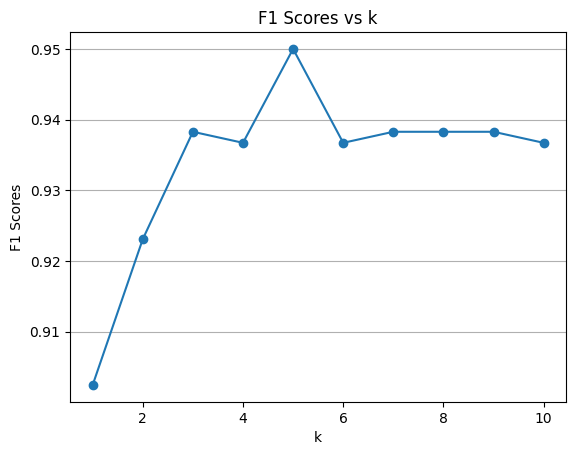

In [ ]:
if __name__ == '__main__':
  X,y = dataCollection()
  X_train, X_test, y_train, y_test = dataPreprocessing(X, y)

  F1_scores = []
  print("Results:")
  for i in range(1,11):
    y_pred = modelTraining(X_train, y_train, X_test, i)
    f1 = modelEvaluation(y_test, y_pred, i)
    F1_scores.append(f1)

displayResults(F1_scores)


##Conclusion


The k-Nearest Neighbors (k-NN) algorithm works by assigning the class of a test data point based on the majority class of its nearest neighbors in feature space. The hyperparameter *k* is the number of neighbors that are considered to make the prediction. In this project, we explored various values of *k*, from 1 to 10, to identify the optimal value that maximizes the model's performance.

After evaluating the model's performance using the F1 score, the best results were achieved when *k=5*, as evident in the plot created above. This means that using the 5 closest data points to predict the class of a new data point gives the best balance between underfitting and overfitting for this dataset:

With small values of *k* (e.g. *k =1*), the model can be overly sensitive to noise in the data, since it relies on just one neighbor, which could be an outlier or unrepresentative of the overall pattern.

With larger values of *k* (e.g. *k=10*), the nearest datapoints may be far apart from each other which would cause the model to oversimplify the decision boundary, leading to less accurate predictions for complex or closely spaced data points.

By choosing *k=5*, the model balances these concerns. It considers enough neighbors to smooth out noise but is still able to capture the underlying structure of the data.


---

In this project, we created an AI pipeline. This automated the tasks of data collection, data preprocessing, model training, and model evaluation. It becomes evident that pipelines such as this one would be essential for automating model development in real-world applications. This automation ensures that AI models can quickly adapt to new data and scale efficiently, reducing the need for manual intervention.

##In Terms of Ethics
The Canadian Medical Association lays out a Code of Ethics to be considered by all medical proffessionals throughout the course of their work. This Code can be applied to the dataset that we have worked with.

The first fundamental commitment laid out in the Code is the *commitment to the well-being of the patient*. All actions taken must be directly for the benefit of the patient. In terms of this dataset, this means that we must ensure that any models developed with the dataset aim directly to improve patient outcomes. This means they must be used for goals such as improving diagnostic accuracy or enabling early detection. The commitment must be upheld to minimize harm that may befall a patient. This means that precautions must be taken to avoid models that could lead to misdiagnoses or improper treatment reccomendations. The models must be regularly validated and any limitations must be disclosed to medical professionals. Any risks must also be disclosed to patients.

The Code also has us uphold a *commitment to respect for persons*. All patients must be treated with the upmost dignity and respect, and this includes the way their data is handled. Patient data must be handled with their privacy in mind and care must be taken to avoid exposing any personal information and to ensure the adherence to privacy regulations. Patients must be allowed the right to consent to their data being used for the model and they must be afforded transparency in regards to how their data will be used. Again, the primary goal of how this data is used must be in benefit of the patient. Patient data must not be used for profit as, without the appropriate safeguards, this can lead to exploitation.

As further modeling of this dataset is pursued, care must be taken to uphold the commitments made in the Code. The model must be developed with transparency and accountability, providing clear documentation on how it is trained, validated, and tested, and disclosing any limitations or risks. It must be made certain that the model is free of inherent biases by ensuring that it works across diverse patient demographics. Lastly, the model must be subject to continuous validation and improvement. Its performance in practice should be regularly assessed and adjusted as necessary to prevent harm.
